In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('/content/drive/MyDrive/유사도 모델/데이터정제_데이터임베딩_토크나이저 변경_231114.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4150 non-null   int64  
 1   NO               4150 non-null   int64  
 2   플랫폼              4150 non-null   int64  
 3   검색어(뉴스,증권뉴스등)    4150 non-null   int64  
 4   게시물주소            4150 non-null   object 
 5   게시물제목            4150 non-null   float64
 6   게시물등록일           4150 non-null   int64  
 7   게시물내용            4150 non-null   float64
 8   언론사명             4150 non-null   object 
 9   뉴스주소             4150 non-null   object 
 10  뉴스제목             4150 non-null   float64
 11  뉴스내용_정제전         4150 non-null   object 
 12  뉴스내용_정제후         4150 non-null   object 
 13  뉴스내용_불용어제거       4150 non-null   object 
 14  유사도_정제전          4150 non-null   float64
 15  유사도_정제후          4150 non-null   float64
 16  비교(정제전vs정제후)     4150 non-null   float64
 17  유사도_불용어제거     

In [5]:
# 입력데이터
X_data = df[['플랫폼', '검색어(뉴스,증권뉴스등)', '게시물제목', '게시물내용', '뉴스제목', '뉴스내용_불용어처리', '게시물등록일']]
# 타겟데이터
y_data = df['similarity']

print('입력데이터 개수 : {}'.format(len(X_data)))
print('타겟데이터 개수 : {}'.format(len(y_data)))

입력데이터 개수 : 4150
타겟데이터 개수 : 4150


In [6]:
# 총 4,150개의 데이터에 대해서 유사한 데이터와 유사하지 않은 데이터의 개수 확인
print(df.groupby('similarity').size().reset_index(name='count'))

   similarity  count
0           0   2622
1           1   1528


In [7]:
# 입력 데이터에 대해 정규화 진행 - 훈련하는 동안 발생할 수 있는 수치적 불안정성 방지

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X_data = scaler.fit_transform(X_data)

In [8]:
# 학습 데이터/ 테스트 데이터 분류

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=33)

In [9]:
print("전체 데이터 개수 : ", len(X_data))
print("학습 데이터 개수 : ", len(X_train))
print("테스트 데이터 개수 : ", len(X_test))

전체 데이터 개수 :  4150
학습 데이터 개수 :  3320
테스트 데이터 개수 :  830


In [10]:
# Oversampling 수행 - SMOTE

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state =33)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [12]:
print("전체 데이터 개수 : ", len(X_data))
print("훈련 데이터 개수 : ", len(X_train_over))
print("테스트 데이터 개수 : ", len(X_test))

전체 데이터 개수 :  4150
훈련 데이터 개수 :  4188
테스트 데이터 개수 :  830


In [13]:
# 레이블이 고르게 분포되었는지 확인
print('훈련 데이터 개수 : ', len(X_train))
print(f'유사한 데이터의 비율 : {round(y_train.value_counts()[1]/len(y_train) * 100, 3)}%')
print(f'유사하지 않은 데이터의 비율 : {round(y_train.value_counts()[0]/len(y_train) * 100, 3)}%')

print()
print('훈련 데이터 개수 : ', len(X_train_over))
print(f'유사한 데이터의 비율 : {round(y_train_over.value_counts()[1]/len(y_train) * 100, 3)}%')
print(f'유사하지 않은 데이터의 비율 : {round(y_train_over.value_counts()[0]/len(y_train) * 100, 3)}%')

print()
print('테스트 데이터 개수 : ', len(X_test))
print(f'유사한 데이터의 비율 : {round(y_test.value_counts()[1]/len(y_test) * 100, 3)}%')
print(f'유사하지 않은 데이터의 비율 : {round(y_test.value_counts()[0]/len(y_test) * 100, 3)}%')

훈련 데이터 개수 :  3320
유사한 데이터의 비율 : 36.928%
유사하지 않은 데이터의 비율 : 63.072%

훈련 데이터 개수 :  4188
유사한 데이터의 비율 : 63.072%
유사하지 않은 데이터의 비율 : 63.072%

테스트 데이터 개수 :  830
유사한 데이터의 비율 : 36.386%
유사하지 않은 데이터의 비율 : 63.614%


In [14]:
# 학습용 입력 데이터는 3차원 배열 구조를 가져야 하므로 3차원으로 변경시켜줘야 함.
# 3차원 입력 데이터 생성 [samples, time steps, features]

import numpy as np

X_train_over = np.reshape(np.array(X_train_over), (X_train_over.shape[0], 1, X_train_over.shape[1]))
X_test = np.reshape(np.array(X_test), (X_test.shape[0], 1, X_test.shape[1]))

In [15]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM, Dense, Input, Dropout
import matplotlib.pyplot as plt

In [16]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid

LSTM 모델 (1)


In [17]:
## 모델 구성 - 64개의 LSTM 레이어와 1개의 Dense 레이어로 구성

# 출력데이터는 데이터셋에서 입력데이터 다음단계의 값이므로 look_back은 1로 설정한다.
# LSTM 모델 구성
model = Sequential()
model.add(LSTM(64, input_shape=(1, 7)))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

# 모델 학습
hist = model.fit(X_train_over, y_train_over, epochs=50, batch_size=128)

Epoch 1/50
33/33 [==============================] - 11s 13ms/step - loss: 0.2478 - accuracy: 0.5993
Epoch 2/50
33/33 [==============================] - 0s 11ms/step - loss: 0.2405 - accuracy: 0.6158
Epoch 3/50
33/33 [==============================] - 0s 9ms/step - loss: 0.2307 - accuracy: 0.7572
Epoch 4/50
33/33 [==============================] - 0s 8ms/step - loss: 0.2168 - accuracy: 0.8116
Epoch 5/50
33/33 [==============================] - 0s 9ms/step - loss: 0.1997 - accuracy: 0.8209
Epoch 6/50
33/33 [==============================] - 0s 9ms/step - loss: 0.1821 - accuracy: 0.8300
Epoch 7/50
33/33 [==============================] - 0s 9ms/step - loss: 0.1666 - accuracy: 0.8336
Epoch 8/50
33/33 [==============================] - 0s 11ms/step - loss: 0.1543 - accuracy: 0.8376
Epoch 9/50
33/33 [==============================] - 0s 12ms/step - loss: 0.1453 - accuracy: 0.8386
Epoch 10/50
33/33 [==============================] - 1s 15ms/step - loss: 0.1387 - accuracy: 0.8388
Epoch 11/50
3

In [18]:
# 성능 평가
model.evaluate(X_train_over, y_train_over) # 50 128

131/131 [==============================] - 1s 2ms/step - loss: 0.1214 - accuracy: 0.8481


[0.12141627818346024, 0.8481375575065613]

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrap  (None, 64)                18432     
 per)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 18497 (72.25 KB)
Trainable params: 18497 (72.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


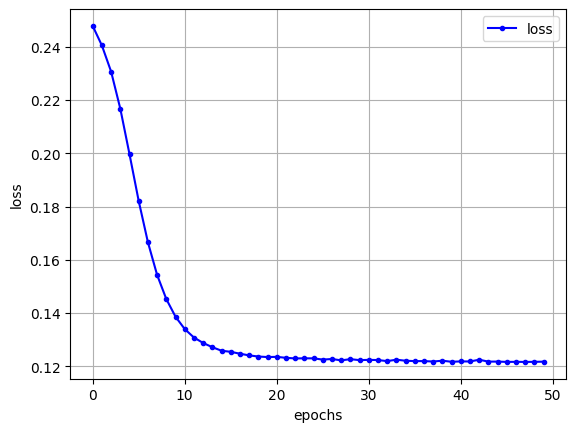

In [20]:
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, marker='.', c='blue', label='loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

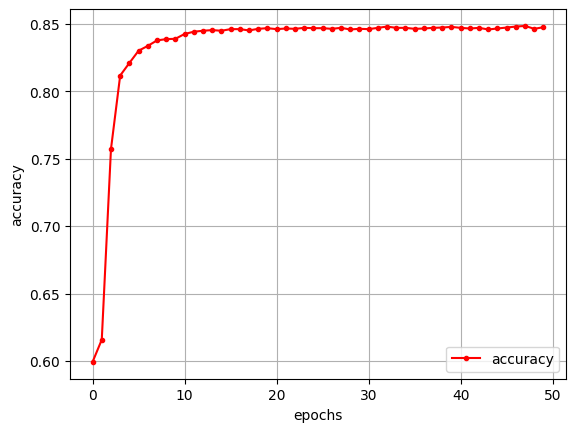

In [21]:
y_acc = hist.history['accuracy']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_acc, marker='.', c='red', label='accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.show()

LSTM 모델 (2)

In [22]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(1, 7)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error',  metrics = ['accuracy'])
hist = model.fit(X_train_over, y_train_over, epochs=50, batch_size=128)

Epoch 1/50
33/33 [==============================] - 7s 11ms/step - loss: 0.4592 - accuracy: 0.5000
Epoch 2/50
33/33 [==============================] - 0s 10ms/step - loss: 0.3542 - accuracy: 0.5000
Epoch 3/50
33/33 [==============================] - 0s 11ms/step - loss: 0.2670 - accuracy: 0.4895
Epoch 4/50
33/33 [==============================] - 0s 10ms/step - loss: 0.2326 - accuracy: 0.6110
Epoch 5/50
33/33 [==============================] - 0s 10ms/step - loss: 0.2084 - accuracy: 0.7096
Epoch 6/50
33/33 [==============================] - 0s 10ms/step - loss: 0.1865 - accuracy: 0.7691
Epoch 7/50
33/33 [==============================] - 0s 10ms/step - loss: 0.1676 - accuracy: 0.8044
Epoch 8/50
33/33 [==============================] - 0s 10ms/step - loss: 0.1567 - accuracy: 0.8207
Epoch 9/50
33/33 [==============================] - 0s 10ms/step - loss: 0.1500 - accuracy: 0.8290
Epoch 10/50
33/33 [==============================] - 0s 10ms/step - loss: 0.1441 - accuracy: 0.8326
Epoch 11/

In [23]:
model.evaluate(X_train_over, y_train_over) # 50 128

131/131 [==============================] - 1s 2ms/step - loss: 0.1182 - accuracy: 0.8472


[0.11815150082111359, 0.8471824526786804]

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_1 (ModuleWr  (None, 1, 20)             2240      
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 1, 20)             0         
 apper)                                                          
                                                                 
 module_wrapper_3 (ModuleWr  (None, 20)                3280      
 apper)                                                          
                                                                 
 module_wrapper_4 (ModuleWr  (None, 20)                0         
 apper)                                                          
                                                                 
 dense_1 (Dense)             (None, 1)                

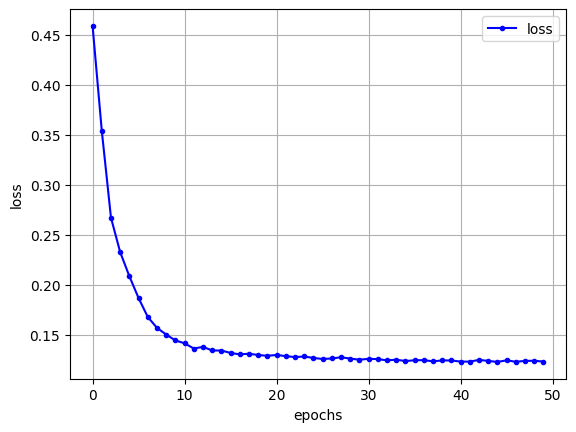

In [25]:
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, marker='.', c='blue', label='loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

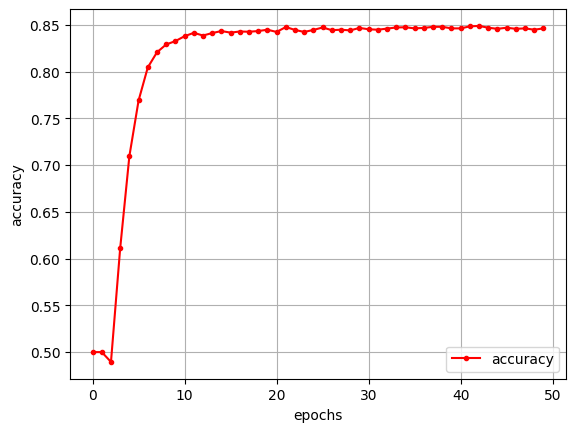

In [26]:
y_acc = hist.history['accuracy']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_acc, marker='.', c='red', label='accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.show()

CNN 모델

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [28]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu', input_shape=(1, 7)))
model.add(Dropout(rate=0.10))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(rate=0.10))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(rate=0.10))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error' ,metrics=['accuracy'])
hist = model.fit(X_train_over, y_train_over, epochs=50, batch_size=128)

Epoch 1/50
33/33 [==============================] - 1s 6ms/step - loss: 0.2302 - accuracy: 0.6569
Epoch 2/50
33/33 [==============================] - 0s 7ms/step - loss: 0.1419 - accuracy: 0.8407
Epoch 3/50
33/33 [==============================] - 0s 6ms/step - loss: 0.1311 - accuracy: 0.8424
Epoch 4/50
33/33 [==============================] - 0s 7ms/step - loss: 0.1304 - accuracy: 0.8426
Epoch 5/50
33/33 [==============================] - 0s 6ms/step - loss: 0.1266 - accuracy: 0.8477
Epoch 6/50
33/33 [==============================] - 0s 6ms/step - loss: 0.1270 - accuracy: 0.8412
Epoch 7/50
33/33 [==============================] - 0s 6ms/step - loss: 0.1251 - accuracy: 0.8460
Epoch 8/50
33/33 [==============================] - 0s 6ms/step - loss: 0.1237 - accuracy: 0.8450
Epoch 9/50
33/33 [==============================] - 0s 6ms/step - loss: 0.1230 - accuracy: 0.8465
Epoch 10/50
33/33 [==============================] - 0s 6ms/step - loss: 0.1227 - accuracy: 0.8467
Epoch 11/50
33/33 [

In [29]:
model.evaluate(X_train_over, y_train_over) # 50 128

131/131 [==============================] - 1s 3ms/step - loss: 0.1139 - accuracy: 0.8584


[0.11389767378568649, 0.8584049940109253]

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 32)             928       
                                                                 
 dropout (Dropout)           (None, 1, 32)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 64)             8256      
                                                                 
 dropout_1 (Dropout)         (None, 1, 64)             0         
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 64)             16448     
                                                                 
 dropout_2 (Dropout)         (None, 1, 64)             0         
                                                                 
 flatten (Flatten)           (None, 64)               

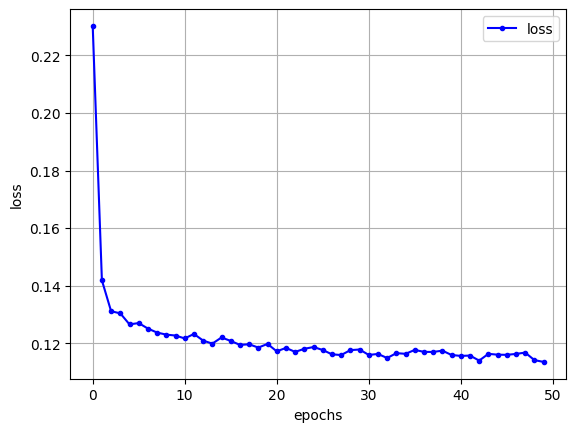

In [31]:
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, marker='.', c='blue', label='loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

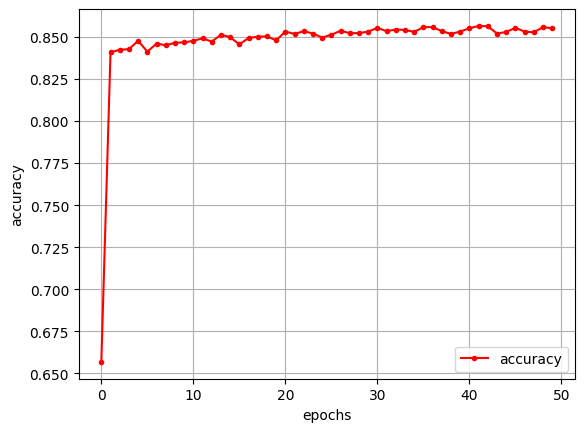

In [32]:
y_acc = hist.history['accuracy']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_acc, marker='.', c='red', label='accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.show()

RNN 모델


In [33]:
from keras.layers import Activation, SimpleRNN

In [34]:
model = Sequential()
model.add(SimpleRNN(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error' ,metrics=['accuracy'])
hist = model.fit(X_train_over, y_train_over, epochs=50, batch_size=128, verbose=1)

Epoch 1/50
33/33 [==============================] - 2s 10ms/step - loss: 0.8929 - accuracy: 0.5000
Epoch 2/50
33/33 [==============================] - 0s 9ms/step - loss: 0.4029 - accuracy: 0.4990
Epoch 3/50
33/33 [==============================] - 0s 10ms/step - loss: 0.2517 - accuracy: 0.5396
Epoch 4/50
33/33 [==============================] - 0s 6ms/step - loss: 0.2191 - accuracy: 0.6306
Epoch 5/50
33/33 [==============================] - 0s 4ms/step - loss: 0.2086 - accuracy: 0.6946
Epoch 6/50
33/33 [==============================] - 0s 3ms/step - loss: 0.2007 - accuracy: 0.7369
Epoch 7/50
33/33 [==============================] - 0s 3ms/step - loss: 0.1942 - accuracy: 0.7627
Epoch 8/50
33/33 [==============================] - 0s 3ms/step - loss: 0.1890 - accuracy: 0.7849
Epoch 9/50
33/33 [==============================] - 0s 8ms/step - loss: 0.1848 - accuracy: 0.8028
Epoch 10/50
33/33 [==============================] - 0s 10ms/step - loss: 0.1814 - accuracy: 0.8102
Epoch 11/50
33/3

In [35]:
model.evaluate(X_train_over, y_train_over) # 50 128

131/131 [==============================] - 2s 8ms/step - loss: 0.1505 - accuracy: 0.8345


[0.15054279565811157, 0.8345271944999695]

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 128       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


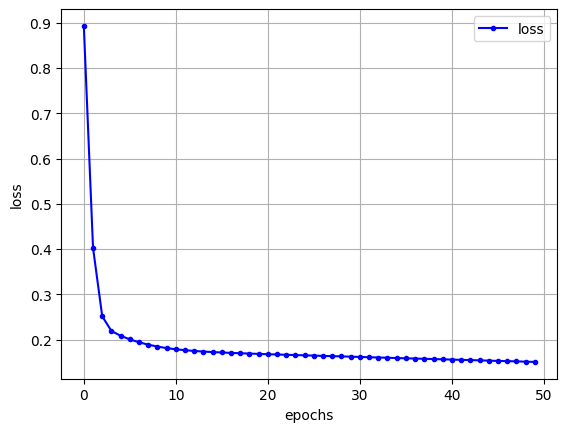

In [37]:
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, marker='.', c='blue', label='loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

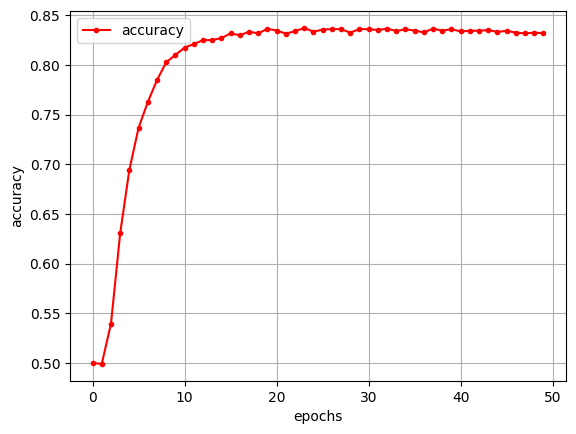

In [38]:
y_acc = hist.history['accuracy']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_acc, marker='.', c='red', label='accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.show()

+) CNN 수정

In [39]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu', input_shape=(1, 7)))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size = 2, padding='same'))
#model.add(Dropout(rate=0.1))

model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size = 2, padding='same'))
#model.add(Dropout(rate=0.1))

model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size = 2, padding='same'))
#model.add(Dropout(rate=0.1))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error' ,metrics=['accuracy'])

In [40]:
model.fit(X_train_over, y_train_over, epochs=50, batch_size=128, verbose=1)

Epoch 1/50
33/33 [==============================] - 5s 21ms/step - loss: 0.2422 - accuracy: 0.6824
Epoch 2/50
33/33 [==============================] - 1s 19ms/step - loss: 0.1444 - accuracy: 0.8422
Epoch 3/50
33/33 [==============================] - 1s 17ms/step - loss: 0.1308 - accuracy: 0.8436
Epoch 4/50
33/33 [==============================] - 1s 19ms/step - loss: 0.1265 - accuracy: 0.8455
Epoch 5/50
33/33 [==============================] - 1s 17ms/step - loss: 0.1252 - accuracy: 0.8453
Epoch 6/50
33/33 [==============================] - 1s 18ms/step - loss: 0.1232 - accuracy: 0.8457
Epoch 7/50
33/33 [==============================] - 0s 12ms/step - loss: 0.1212 - accuracy: 0.8472
Epoch 8/50
33/33 [==============================] - 0s 11ms/step - loss: 0.1232 - accuracy: 0.8505
Epoch 9/50
33/33 [==============================] - 0s 10ms/step - loss: 0.1224 - accuracy: 0.8486
Epoch 10/50
33/33 [==============================] - 0s 10ms/step - loss: 0.1215 - accuracy: 0.8512
Epoch 11/

In [41]:
model.evaluate(X_train_over, y_train_over) # 1 64

131/131 [==============================] - 1s 3ms/step - loss: 0.1155 - accuracy: 0.8522


[0.11552413552999496, 0.8521967530250549]

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 1, 32)             928       
                                                                 
 conv1d_4 (Conv1D)           (None, 1, 32)             4128      
                                                                 
 max_pooling1d (MaxPooling1  (None, 1, 32)             0         
 D)                                                              
                                                                 
 conv1d_5 (Conv1D)           (None, 1, 64)             8256      
                                                                 
 conv1d_6 (Conv1D)           (None, 1, 64)             16448     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                 

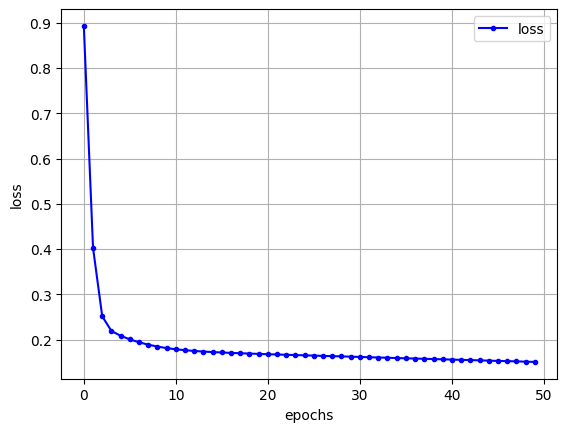

In [43]:
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, marker='.', c='blue', label='loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

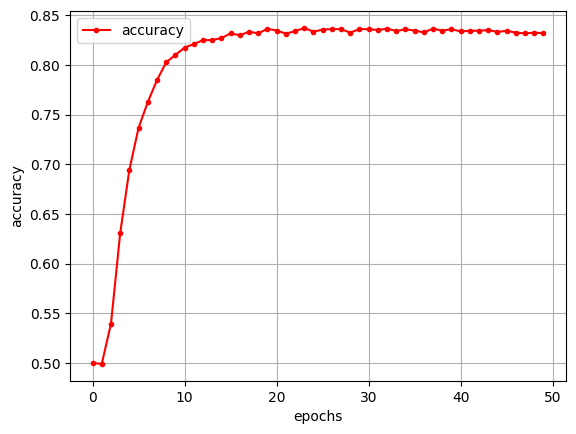

In [44]:
y_acc = hist.history['accuracy']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_acc, marker='.', c='red', label='accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.show()